In [2]:
from impact_score.model.lgbm_loader import load_lgbm
import lightgbm

from pathlib import Path
import os
import pandas as pd
import shap

vm = load_lgbm()
model: lightgbm.LGBMClassifier = vm.model
features = model.feature_name_

def get_dataset_reference():
    model_improvement_folder = Path(os.getcwd())
    model_folder = model_improvement_folder.parent
    impact_score_folder = model_folder.parent
    return Path(impact_score_folder, "datasets")

filename = "100.csv"
df = pd.read_csv(f"{get_dataset_reference()}\\{filename}")

Model path: E:\Python\Datascience_impact\impact_score\model\model.pkl
Model loading time: 0.060463800000000845


In [3]:
x = df[features]
y = df["FinalWinner"]

In [4]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(x)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


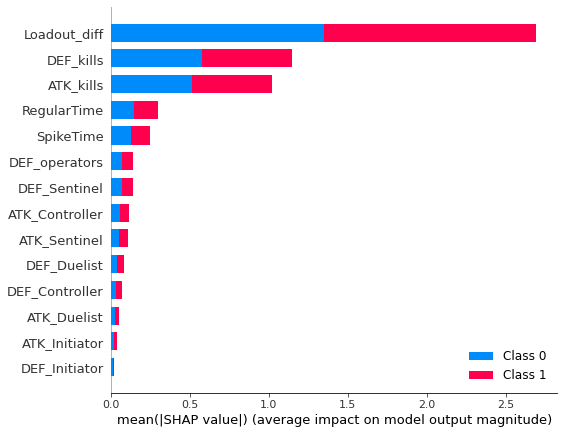

In [5]:
shap.summary_plot(shap_values, x)

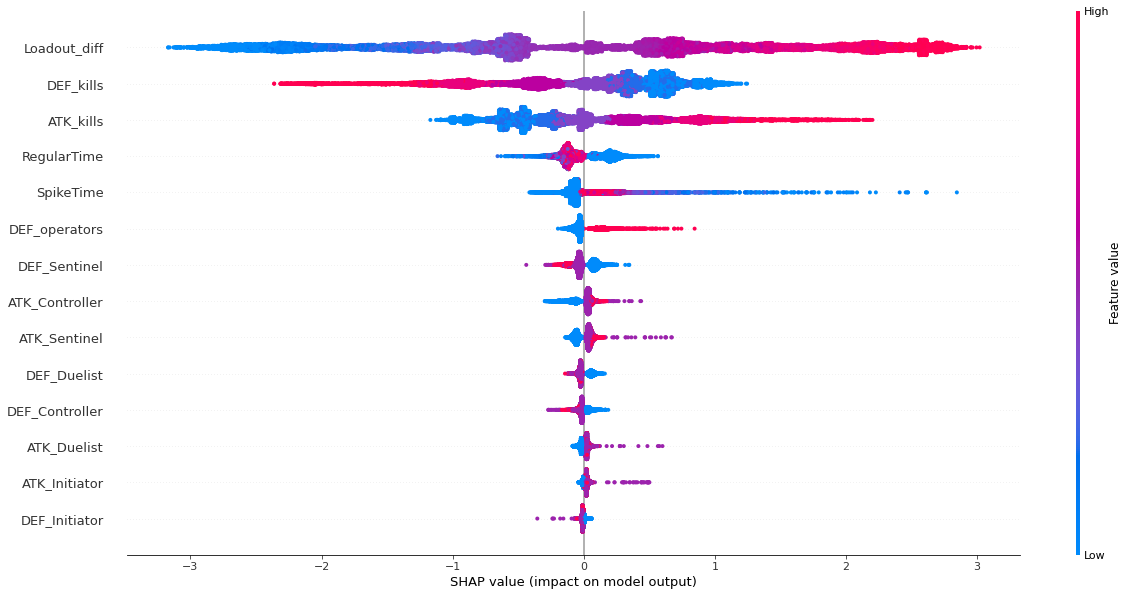

In [6]:
shap.summary_plot(shap_values[1], x, plot_size=(20,10))

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


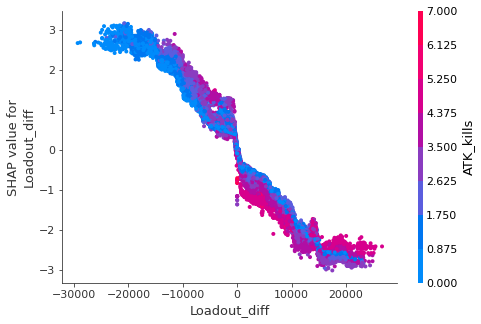

In [8]:
shap.dependence_plot("Loadout_diff", shap_values[0], x)

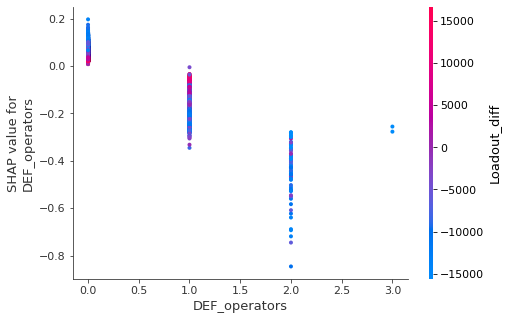

In [9]:
shap.dependence_plot("DEF_operators", shap_values[0], x)

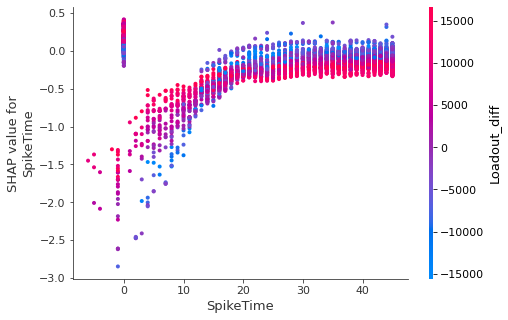

In [13]:
shap.dependence_plot("SpikeTime", shap_values[0], x)

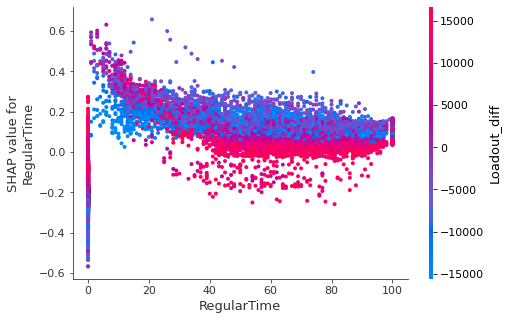

In [14]:
shap.dependence_plot("RegularTime", shap_values[0], x)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


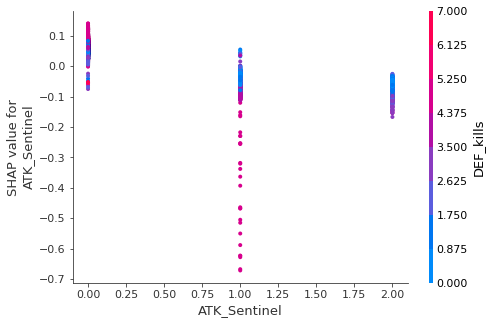

In [15]:
shap.dependence_plot("ATK_Sentinel", shap_values[0], x)

In [8]:
x.iloc[29]

RegularTime           0
SpikeTime            37
DEF_operators         0
Loadout_diff      19400
ATK_kills             3
ATK_Initiator         1
ATK_Duelist           2
ATK_Sentinel          1
ATK_Controller        1
DEF_kills             0
DEF_Initiator         1
DEF_Duelist           0
DEF_Sentinel          0
DEF_Controller        1
Name: 29, dtype: int64

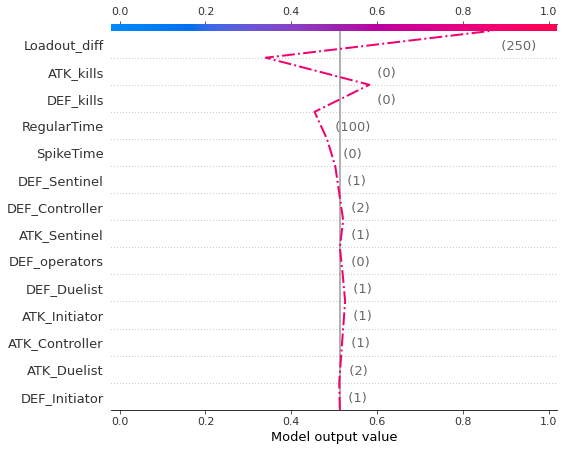

In [20]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][25], x, link="logit", highlight=0)

In [17]:
shap.initjs()
columIndex= 29
shap.force_plot(explainer.expected_value[1], shap_values[1][columIndex,:], x.iloc[columIndex,:], link="logit")

In [8]:
shap.force_plot(explainer.expected_value[1], shap_values[0][:20], x)